In [52]:
import pandas as pd
import numpy as np
from numpy import cov

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
# multivariate linear regression with regularization
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# support vector machine regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# neural network
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
# normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
# score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
# import keras
import tensorflow.keras
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
# import regularizer
from tensorflow.keras.regularizers import l1, l2
# import matplotlib
import matplotlib.pyplot as plt
# os
# randomseed

from numpy.random import seed
from numpy import asarray
from numpy import savetxt
###############################3
import os
import pickle
from calendar import monthrange


In [53]:
tensorflow.random.set_seed(0)

In [54]:
area_df     = pd.read_excel('area_2003-2019.xls', sheet_name = 'Sheet1')
lychee_yield_df = pd.read_excel('lycheeproduct.xlsx')
humidChiangrai=pd.read_excel('humidchiangrai.xlsx',sheet_name = 'Sheet2')
tempchiangrai=pd.read_excel('temperaturechiangrai.xlsx',sheet_name = 'Sheet2')
rainchiangrai=pd.read_excel('rainchiangrai.xlsx')
tempchiangrai=tempchiangrai.iloc[:,0:12]
humidChiangrai=humidChiangrai.iloc[:,0:12]
print(tempchiangrai)

JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC
0   19.9  21.0  24.2  27.0  26.6  27.4  26.8  27.0  26.4  24.9  21.4  20.5
1   20.2  21.7  24.8  27.2  26.6  27.2  26.3  26.3  26.8  25.9  22.1  19.1
2   19.5  22.8  24.7  27.1  27.5  27.0  27.2  27.0  27.1  26.4  23.0  20.5
3   21.9  22.3  24.5  28.5  29.0  28.6  27.4  26.7  26.7  25.9  22.6  21.8
4   20.8  22.0  23.6  25.7  26.7  27.4  27.2  26.3  26.7  25.6  22.4  20.3
5   20.6  22.8  24.6  27.5  27.4  27.6  26.5  26.9  26.5  26.1  25.2  22.1
6   21.1  24.1  24.2  28.5  28.2  27.6  26.8  26.7  26.3  24.5  24.0  18.5
7   19.3  22.0  24.6  27.3  27.9  28.0  26.9  26.5  26.8  25.8  24.1  20.9
8   19.6  21.7  25.1  26.4  28.5  28.7  27.7  27.2  27.2  25.6  24.6  21.7
9   19.0  21.6  26.1  29.5  28.9  27.5  26.8  27.1  27.1  26.5  24.6  21.7
10  21.5  22.8  25.9  26.7  27.6  27.8  26.8  27.1  27.0  26.1  24.2  20.7
11  21.0  22.6  24.7  25.9  27.0  27.1  27.3  26.8  27.3  26.1  23.1  22.5


In [55]:
rainchiangrai=pd.read_excel('cm_met_ChiangRai.xlsx',sheet_name='Rainfall')
pressurechiangrai=pd.read_excel('cm_met_ChiangRai.xlsx',sheet_name='Pressure')
pheno=pd.read_excel('cm_met_Chiangrai.xlsx',sheet_name='pheno')

rainchiangrai=rainchiangrai.iloc[0,1:]
rainchiangrai=rainchiangrai.to_numpy()
rainchiangrai=rainchiangrai.reshape(12,13)
rainchiangrai=np.delete(rainchiangrai,12,1)
###############################################3
pressurechiangrai=pressurechiangrai.iloc[0,1:]
pressurechiangrai=pressurechiangrai.to_numpy()
pressurechiangrai=pressurechiangrai.reshape(12,13)
pressurechiangrai=np.delete(pressurechiangrai,12,1)
#########################################################
pheno=pheno.iloc[3,2:]
pheno=pheno.to_numpy()
pheno=pheno.reshape(12,12)
########################################################

inputchiangrai=pd.read_excel('input.xlsx')
Y_chiangrai=inputchiangrai.iloc[3:,3]
inputchiangrai=inputchiangrai.iloc[3:,:4]
inputchiangrai=inputchiangrai.to_numpy()
#######################################################################
Y_chiangrai=Y_chiangrai.to_numpy()
tempchiangrai=tempchiangrai.to_numpy()

humidChiangrai=humidChiangrai.to_numpy()

print(humidChiangrai.shape)

(12, 12)


In [56]:
####################DATAINPUT##########################################33
X_chiangrai=inputchiangrai[:,0:3]
X_chiangrai=np.concatenate((tempchiangrai[:,0:2],X_chiangrai),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,pheno[:,0:2]),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,rainchiangrai[:,2:4]),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,humidChiangrai[:,0:2]),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,pressurechiangrai[:,0:2]),axis=1)

In [57]:
######################################chiangmai####################################################################

In [58]:
inputchiagmai=pd.read_excel('inputchiangmai.xlsx')
tempchiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Temperature')
phenochiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Phenomena')
humidchiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Humidity')
rainchiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Rainfall')
pressurechiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Pressure')
Y_chiangmai=inputchiagmai.iloc[1:,3]



In [59]:
tempchiangmai=tempchiangmai.iloc[4,1:]
tempchiangmai=tempchiangmai.to_numpy()
tempchiangmai=tempchiangmai.reshape(13,13)
tempchiangmai=np.delete(tempchiangmai,9,0)
inputchiagmai=inputchiagmai.iloc[1:,:3]
#######################################################
phenochiangmai=phenochiangmai.iloc[3,1:]
phenochiangmai=phenochiangmai.to_numpy()
phenochiangmai=phenochiangmai.reshape(13,13)
phenochiangmai=np.delete(phenochiangmai,9,0)
########################################################


In [60]:
rainchiangmai=rainchiangmai.iloc[0,1:]
rainchiangmai=rainchiangmai.to_numpy()
rainchiangmai=rainchiangmai.reshape(13,13)
rainchiangmai=np.delete(rainchiangmai,12,1)
rainchiangmai=np.delete(rainchiangmai,9,0)
humidchiangmai=humidchiangmai.iloc[0,1:]
humidchiangmai=humidchiangmai.to_numpy()
humidchiangmai=humidchiangmai.reshape(13,13)
humidchiangmai=np.delete(humidchiangmai,12,1)

In [61]:

humidchiangmai=np.delete(humidchiangmai,9,0)
inputchiagmai=inputchiagmai.to_numpy()
Y_chiangmai=Y_chiangmai.to_numpy()
pressurechiangmai=pressurechiangmai.iloc[0,1:]
pressurechiangmai=pressurechiangmai.to_numpy()
pressurechiangmai=pressurechiangmai.reshape(13,13)
pressurechiangmai=np.delete(pressurechiangmai,12,1)
pressurechiangmai=np.delete(pressurechiangmai,9,0)
#X_chiangmai=tempchiangmai[:,0:2]
X_chiangmai=inputchiagmai[:,0:3]
X_chiangmai=np.concatenate((tempchiangmai[:,0:2],X_chiangmai,),axis=1)
X_chiangmai=np.concatenate((X_chiangmai,phenochiangmai[:,0:2]),axis=1)
X_chiangmai=np.concatenate((X_chiangmai,rainchiangmai   [:,2:4]),axis=1)
X_chiangmai=np.concatenate((X_chiangmai,humidchiangmai[:,0:2]),axis=1)
X_chiangmai=np.concatenate((X_chiangmai,pressurechiangmai[:,0:2]),axis=1)

In [62]:
inputphayao=pd.read_excel('input3.xlsx')
tempphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Temperature')
phenophayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Phenomena')
humidphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Humidity')
rainphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Rainfall')
pressphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Pressure')
Y_phayao=inputphayao.iloc[1:,3]

In [63]:
rainphayao= rainphayao.drop(['Elements', 'Unnamed: 1', 'N-Years','Elements.1', 'Unnamed: 17', 'N-Years.1','Elements.2', 'Unnamed: 33', 'N-Years.2','Elements.3', 'Unnamed: 49', 'N-Years.3','Elements.4', 'Unnamed: 65', 'N-Years.4',], axis=1)
rainphayao= rainphayao.drop(['Elements.5', 'Unnamed: 81', 'N-Years.5','Elements.6', 'Unnamed: 97', 'N-Years.6','Elements.7', 'Unnamed: 113', 'N-Years.7','Elements.8', 'Unnamed: 129', 'N-Years.8','Elements.9', 'Unnamed: 145', 'N-Years.9',], axis=1)
rainphayao= rainphayao.drop(['Elements.10', 'Unnamed: 161', 'N-Years.10','Elements.11', 'Unnamed: 177', 'N-Years.11',], axis=1)


In [64]:
rainphayao=rainphayao.replace('-',0)

In [65]:
rainphayao=rainphayao.to_numpy()
tempphayao=tempphayao.to_numpy()
humidphayao=humidphayao.to_numpy()
pressphayao=pressphayao.to_numpy()
phenophayao=phenophayao.to_numpy()
Y_phayao=Y_phayao.to_numpy()

In [66]:
tempphayao=tempphayao[0,1:]
rainphayao=rainphayao[0,:]
humidphayao=humidphayao[0,1:]
pressphayao=pressphayao[0,1:]
phenophayao=phenophayao[3,1:]
rainphayao=rainphayao.reshape(12,13)
tempphayao=tempphayao.reshape(12,13)
humidphayao=humidphayao.reshape(12,13)
pressphayao=pressphayao.reshape(12,13)
phenophayao=phenophayao.reshape(12,13)
rainphayao=np.delete(rainphayao,12,1)
tempphayao=np.delete(tempphayao,12,1)
humidphayao=np.delete(humidphayao,12,1)
pressphayao=np.delete(pressphayao,12,1)
phenophayao=np.delete(phenophayao,12,1)
inputphayao=inputphayao.to_numpy()

In [67]:
X_phayao=inputphayao[1:,0:3]
X_phayao=np.concatenate((tempphayao[:,0:2],X_phayao,),axis=1)
X_phayao=np.concatenate((X_phayao,phenophayao[:,0:2]),axis=1)
X_phayao=np.concatenate((X_phayao,rainphayao[:,2:4]),axis=1)
X_phayao=np.concatenate((X_phayao,humidphayao[:,0:2]),axis=1)
X_phayao=np.concatenate((X_phayao,pressphayao[:,0:2]),axis=1)
X_phayao=np.delete(X_phayao,9,0)
Y_phayao=np.delete(Y_phayao,9,0)


In [68]:
X=X_chiangrai[:,[2,3,4,5,7,8,9,10,11,12]]
Tmp=X
Y=Y_chiangrai

In [69]:
print(X)

[[322.0 24.0 51211.0 1 28.9 213.8 69 63 1015.85 1012.96]
 [271.0 12.0 45982.0 0 40.4 178.9 76 73 1013.3 1012.37]
 [277.0 10.0 37228.0 0 31.9 52.1 72 68 1015.7 1010.2]
 [252.0 47.0 37228.0 1 23.9 89.8 72 63 1014.1 1011.7]
 [287.0 1.0 33938.0 1 91.9 84.8 75 67 1012.7 1010.5]
 [247.0 22.0 33586.0 1 37.5 104.7 75 68 1012.42 1009.22]
 [217.0 32.0 31916.0 1 59.1 2.2 76 75 1013.4 1011.6]
 [319.0 17.0 24290.0 0 6.4 131.7 77 66 1016.1 1010.7]
 [294.0 22.0 20476.0 0 22.4 191.8 75 69 1015.8 1012.9]
 [278.0 65.0 19426.0 0 0 4.8 73 68 1015.2 1015.2]
 [232.0 25.0 19316.0 0 12.2 160.9 80 68 1014.4 1013.1]
 [240.0 4.0 18624.0 0 35.6 136.6 78 70 1011.9 1012.5]]


In [70]:
Rootmean=tensorflow.keras.metrics.RootMeanSquaredError()

In [71]:
class Scaler3D():

    def __init__(self):
        self.scaler_list = {}

    def fit(self, x):
        self.x = x
        
        min_list = np.array([])
        max_list = np.array([])

        len_feature = x.shape[-1]

        for i in range(len_feature):
            self.scaler_list[i] = MinMaxScaler()
            self.scaler_list[i].fit(x[:, :, i])

    def transform(self, x):
        x_copy = x.copy()

        len_feature = x.shape[-1]

        for i in range(len_feature):
            x_copy[:,:,i] = self.scaler_list[i].transform(x[:, :, i])

        return x_copy

In [72]:
def rmse(y_true, y_pred):

    ind_ignorezero = (y_true != 0).reshape(-1,)
    error = (y_true - y_pred)
    se = error**2
    mse = np.mean(se)
    rmse = mse**0.5
    return rmse
def mape(y_true, y_pred):
    error = y_true - y_pred
    pe     = (y_true - y_pred)/y_true*100
    ape = np.abs(pe)
    mape = np.mean(ape)

    return mape  
def mae(y_true, y_pred):

    error = y_true - y_pred
    ae = np.abs(error)
    mae = np.mean(ae)

    return mae

In [73]:
n_size=X.shape[0]
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.3)
X_train_ord = X[:int(n_size*(1-0.3)), :]
X_test_ord  = X[int(n_size*(1-0.3)):, :]
Y_train_ord = Y[:int(n_size*(1-0.3))]
Y_test_ord  = Y[int(n_size*(1-0.3)):]

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_ord, np.log1p(Y_train_ord))
Y_all_test = lin_reg.predict(X)
Y_all_test[Y_all_test<0] = 0

Y_all_test = np.expm1(Y_all_test)

train_mae = mae(Y[:int(n_size*(1-0.3))], Y_all_test[:int(n_size*(1-0.3))])
test_mae = mae(Y[int(n_size*(1-0.3)):], Y_all_test[int(n_size*(1-0.3)):])

train_rmse = rmse(Y[:int(n_size*(1-0.3))], Y_all_test[:int(n_size*(1-0.3))])
test_rmse = rmse(Y[int(n_size*(1-0.3)):], Y_all_test[int(n_size*(1-0.3)):])

train_mape = mape(Y[:int(n_size*(1-0.3))], Y_all_test[:int(n_size*(1-0.3))])
test_mape = mape(Y[int(n_size*(1-0.3)):], Y_all_test[int(n_size*(1-0.3)):])

print('train MAE {:.2f}\ttest MAE {:.2f}'.format(train_mae, test_mae))
print('train RMSE {:.2f}\ttest RMSE {:.2f}'.format(train_rmse, test_rmse))
print('train MAPE {:.2f}\ttest MAPE {:.2f}'.format(train_mape, test_mape))
print('=========================')

train MAE 0.00	test MAE 1219.32
train RMSE 0.00	test RMSE 1303.17
train MAPE 0.00	test MAPE 22.05


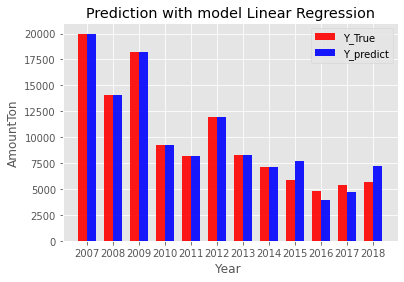

In [75]:
plt.style.use('ggplot')
n = X_chiangmai.shape[0]

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, Y_all_test, bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Prediction with model Linear Regression')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
    ))
ax.legend()
plt.show()

In [76]:

X_train=K.constant(X_train)
Y_train=K.constant(Y_train)
X_test=K.constant(X_test)
Y_test=K.constant(Y_test)
Y_train=K.constant(Y_train)
X_train_ord=K.constant(X_train_ord)
Y_train_ord=K.constant(Y_train_ord)
X_test_ord=K.constant(X_test_ord)
Y_test_ord=K.constant(Y_test_ord)
X=K.constant(X)

In [77]:
reg = l1(0.02)
neural2 = Sequential()
scaler=MinMaxScaler()
    # input layer
neural2.add(Dense(256, activation='relu', input_dim=X.shape[1]))
    # hidden layer
neural2.add(Dropout(0.2))
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg)) 
neural2.add(Dropout(0.2))
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg))   
neural2.add(Dropout(0.2))
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg))
neural2.add(Dropout(0.2))   
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg))  
# output layer
neural2.add(Dense(1, activation='relu'))
neural2.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [78]:
neural2.fit(X_train_ord,Y_train_ord,epochs=100, verbose=1, batch_size=32)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 2s 209ms/sample - loss: 167984464.0000 - root_mean_squared_error: 12960.8545 - mae: 12127.8750 - mape: 100.0000
Epoch 2/100
8/8 [==============================] - 0s 2ms/sample - loss: 166847872.0000 - root_mean_squared_error: 12916.9336 - mae: 12096.5244 - mape: 99.8282
Epoch 3/100
8/8 [==============================] - 0s 1ms/sample - loss: 139836128.0000 - root_mean_squared_error: 11825.2031 - mae: 10964.2734 - mape: 89.7380
Epoch 4/100
8/8 [==============================] - 0s 2ms/sample - loss: 38866660.0000 - root_mean_squared_error: 6234.2588 - mae: 5191.2207 - mape: 38.5386
Epoch 5/100
8/8 [==============================] - 0s 2ms/sample - loss: 19163910.0000 - root_mean_squared_error: 4377.5840 - mae: 3756.9587 - mape: 38.8921
Epoch 6/100
8/8 [==============================] - 0s 1ms/sample - loss: 70881352.0000 - root_mean_squared_error: 8419.0674 - mae: 7680.1377 - mape: 73.7597
Epoch 7/100
8/8 [==========

In [79]:
y_pred=neural2.predict(X)
print(y_pred)

[[16491.713 ]
 [14784.17  ]
 [11926.385 ]
 [11924.148 ]
 [10846.928 ]
 [10737.582 ]
 [10187.109 ]
 [ 7707.9727]
 [ 6462.722 ]
 [ 6115.3223]
 [ 6085.2114]
 [ 5859.4033]]


In [80]:
accuracy=neural2.evaluate(X_train_ord, Y_train_ord)

8/1 [================================================================================================================================================================================================================================================] - 0s 30ms/sample - loss: 9066210.0000 - root_mean_squared_error: 3010.9275 - mae: 2454.7061 - mape: 20.1145


In [81]:
accuracy=neural2.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 1ms/sample - loss: 617315.7500 - root_mean_squared_error: 785.3603 - mae: 683.4147 - mape: 13.0859


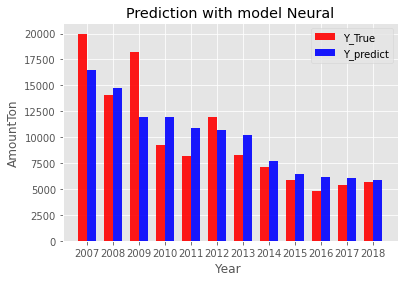

In [82]:
plt.style.use('ggplot')
n = X_chiangmai.shape[0]

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_pred.reshape(12,), bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Prediction with model Neural')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
    ))
ax.legend()
plt.show()

In [83]:
####################################################GRU#############################

In [84]:
X=Tmp

In [85]:
X=X.reshape(X.shape[0],1,X.shape[1])

In [86]:
n_size=X.shape[0]

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.3)
X_train_ord = X[:int(n_size*(1-0.3)), :,:]
X_test_ord  = X[int(n_size*(1-0.3)):, :,:]
Y_train_ord = Y[:int(n_size*(1-0.3))]
Y_test_ord  = Y[int(n_size*(1-0.3)):]

In [87]:

X_train=K.constant(X_train)
Y_train=K.constant(Y_train)
X_test=K.constant(X_test)
Y_test=K.constant(Y_test)
Y_train=K.constant(Y_train)
X_train_ord=K.constant(X_train_ord)
Y_train_ord=K.constant(Y_train_ord)
X_test_ord=K.constant(X_test_ord)
Y_test_ord=K.constant(Y_test_ord)
X=K.constant(X)

In [88]:
tensorflow.random.set_seed(0)

In [89]:
########################LSTMแบบที่1######

In [90]:
rnn_LSTM2 = Sequential()
rnn_LSTM2.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
rnn_LSTM2.add(Dropout(0.2))
rnn_LSTM2.add(LSTM(512, activation='relu',return_sequences=True))
rnn_LSTM2.add(Dropout(0.2))
rnn_LSTM2.add(LSTM(512, activation='relu',return_sequences=True))
rnn_LSTM2.add(Dropout(0.2))
#rnn_LSTM2.add(LSTM(50, activation='relu',return_sequences=True))
rnn_LSTM2.add(Dropout(0.2))
rnn_LSTM2.add(Dense(512, activation='relu'))
#rnn_LSTM.add(Dropout(0.2))
rnn_LSTM2.add(Dense(1, activation='relu'))
rnn_LSTM2.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [91]:
rnn_LSTM2.fit(X_train_ord,Y_train_ord, epochs=100, batch_size=32, verbose=1)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 5s 662ms/sample - loss: 167885488.0000 - root_mean_squared_error: 12957.0635 - mae: 12123.9658 - mape: 99.9641
Epoch 2/100
8/8 [==============================] - 0s 4ms/sample - loss: 166895136.0000 - root_mean_squared_error: 12918.7900 - mae: 12086.0430 - mape: 99.6445
Epoch 3/100
8/8 [==============================] - 0s 5ms/sample - loss: 165109984.0000 - root_mean_squared_error: 12849.5127 - mae: 12016.8809 - mape: 99.0460
Epoch 4/100
8/8 [==============================] - 0s 4ms/sample - loss: 163437696.0000 - root_mean_squared_error: 12784.2754 - mae: 11952.6514 - mape: 98.4806
Epoch 5/100
8/8 [==============================] - 0s 3ms/sample - loss: 162809712.0000 - root_mean_squared_error: 12759.6904 - mae: 11914.7129 - mape: 98.0423
Epoch 6/100
8/8 [==============================] - 0s 3ms/sample - loss: 158391232.0000 - root_mean_squared_error: 12585.3574 - mae: 11741.1982 - mape: 96.5550
Epoch 7/100
8/8 [==

In [92]:
y_pred1=rnn_LSTM2.predict(X)
#y_pred1=rnn_LSTM2.reshape(12,)
print(y_pred1)

[[[15870.102 ]]

 [[14404.617 ]]

 [[11554.677 ]]

 [[11555.156 ]]

 [[10542.311 ]]

 [[10439.074 ]]

 [[ 9920.504 ]]

 [[ 7580.1406]]

 [[ 6409.2104]]

 [[ 6077.988 ]]

 [[ 6053.361 ]]

 [[ 5837.295 ]]]


In [93]:
accuracy=rnn_LSTM2.evaluate(X_train_ord, Y_train_ord)

8/1 [================================================================================================================================================================================================================================================] - 1s 90ms/sample - loss: 9754363.0000 - root_mean_squared_error: 3123.1975 - mae: 2435.2344 - mape: 19.1402


In [94]:
accuracy=rnn_LSTM2.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 3ms/sample - loss: 566092.6250 - root_mean_squared_error: 752.3913 - mae: 647.2136 - mape: 12.4209


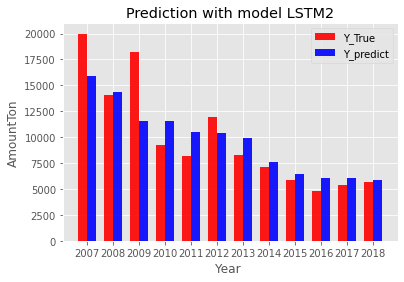

In [95]:
plt.style.use('ggplot')
n = X_chiangmai.shape[0]

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_pred1.reshape(12,), bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Prediction with model LSTM2')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
    ))
ax.legend()
plt.show()

In [96]:
GruChiangmai = Sequential()
GruChiangmai.add(GRU(10, activation='relu', return_sequences=True, input_shape=(X.shape[1],X.shape[2])))

GruChiangmai.add(GRU(50, activation='relu', return_sequences=True))

GruChiangmai.add(GRU(50, activation='relu',return_sequences=True))    
GruChiangmai.add(GRU(50, activation='relu',return_sequences=True))   
    # rnn.add(BatchNormalization())    
#GruChiangmai.add(Dropout(0.4))
GruChiangmai.add(Dense(50, activation='relu'))
#GruChiangmai.add(Dropout(0.4))    
GruChiangmai.add(Dense(1, activation='relu'))
GruChiangmai.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [97]:
GruChiangmai.fit(X_train_ord, Y_train_ord, epochs=100, batch_size=32, verbose=1)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 9s 1s/sample - loss: 167359504.0000 - root_mean_squared_error: 12936.7500 - mae: 12103.5928 - mape: 99.7846
Epoch 2/100
8/8 [==============================] - 0s 4ms/sample - loss: 167235456.0000 - root_mean_squared_error: 12931.9551 - mae: 12098.8203 - mape: 99.7427
Epoch 3/100
8/8 [==============================] - 0s 5ms/sample - loss: 167074624.0000 - root_mean_squared_error: 12925.7354 - mae: 12092.5830 - mape: 99.6877
Epoch 4/100
8/8 [==============================] - 0s 4ms/sample - loss: 166903168.0000 - root_mean_squared_error: 12919.1006 - mae: 12085.9199 - mape: 99.6287
Epoch 5/100
8/8 [==============================] - 0s 3ms/sample - loss: 166718448.0000 - root_mean_squared_error: 12911.9502 - mae: 12078.7070 - mape: 99.5647
Epoch 6/100
8/8 [==============================] - 0s 4ms/sample - loss: 166496704.0000 - root_mean_squared_error: 12903.3604 - mae: 12070.1230 - mape: 99.4891
Epoch 7/100
8/8 [=====

In [98]:
accuracy=GruChiangmai.evaluate(X_train_ord, Y_train_ord)

8/1 [================================================================================================================================================================================================================================================] - 1s 146ms/sample - loss: 9206822.0000 - root_mean_squared_error: 3034.2747 - mae: 2654.4836 - mape: 23.9382


In [99]:
accuracy=GruChiangmai.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 4ms/sample - loss: 2483379.2500 - root_mean_squared_error: 1575.8741 - mae: 1544.2634 - mape: 28.8539


In [100]:
y_GRU=GruChiangmai.predict(X)


In [101]:
print(y_GRU)

[[[17434.445]]

 [[15705.235]]

 [[12713.275]]

 [[12721.535]]

 [[11692.651]]

 [[11573.476]]

 [[10915.479]]

 [[ 8579.165]]

 [[ 7404.669]]

 [[ 6822.362]]

 [[ 6984.092]]

 [[ 6754.931]]]


In [ ]:
plt.style.use('ggplot')
n = X_chiangmai.shape[0]

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_GRU.reshape(12,), bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Y_chiangmai with model LSTM')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
    ))
ax.legend()
plt.show()